In [2]:
import numpy as np  # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package
import os
import pandas as pd
# Display array values to 6 digits of precision
np.set_printoptions(precision=4, suppress=True)

In [3]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Input, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.utils import to_categorical
batch_size = 64
epochs = 20
num_classes = 2

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [5]:
root_dir="D:\Documents\SEM8\Data\COBRE"

In [6]:
import pandas as pd
xt1=pd.read_csv((root_dir+ '\demo.csv'))

y_target=xt1['y']

xt1 = xt1.drop(['y'],axis=1)
print(len(y_target), len(xt1))
xt1=xt1.to_numpy()
y_target=y_target.to_numpy()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(xt1,y_target, random_state=10, test_size=0.15, shuffle=True)

141 141


SVM

Accuracy:  0.6818181818181818
Precision:  0.6153846153846154
Recall:  0.8
F1 Score:  0.6956521739130435


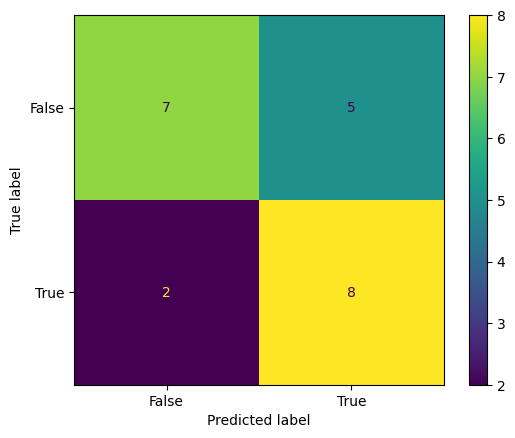

In [6]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
predlr=clf.predict(x_test)

precision = precision_score(y_test, predlr)
recall = recall_score(y_test, predlr)

print('Accuracy: ',accuracy_score(y_test,predlr))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, predlr))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predlr), display_labels = [False, True])
cm_display.plot()
plt.show()

Grid Search - SVM

Accuracy:  0.8181818181818182
Precision:  0.75
Recall:  0.9
F1 Score:  0.8181818181818182


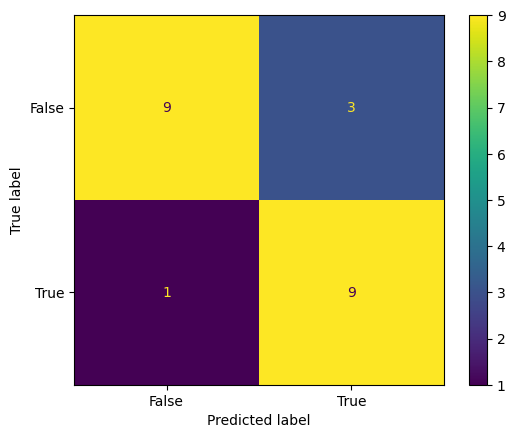

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear','rbf']}

grid = GridSearchCV(SVC(), param_grid, cv = 10, scoring='accuracy', refit = True, verbose = 0)

# fitting the model for grid search
grid.fit(x_train, y_train)


predlr = grid.predict(x_test)

precision = precision_score(y_test, predlr)
recall = recall_score(y_test, predlr)

print('Accuracy: ',accuracy_score(y_test,predlr))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, predlr))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predlr), display_labels = [False, True])
cm_display.plot()
plt.show()

In [47]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are your data
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Define the function to create a Keras model
def create_ann_model():
    model = Sequential([
        Dense(20, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.5),
        Dense(104, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier
ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=16, verbose=0)
ann_model._estimator_type = "classifier"
# Create SVM classifier
svm_model = SVC(probability=True)

# Create an ensemble of ANN and SVM
ensemble_model = VotingClassifier(estimators=[('ann', ann_model), ('svm', svm_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Test Accuracy: {accuracy_ensemble}')


C:\Users\HP\AppData\Local\Temp\ipykernel_40996\1429435708.py:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=16, verbose=0)


1/1 [==============================] - 0s 56ms/step
Ensemble Test Accuracy: 0.7727272727272727


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Reshape data for CNN (assuming one-dimensional input)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the function to create a CNN model
def create_cnn_model():
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the CNN model using KerasClassifier
cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=100, batch_size=16, verbose=0)
cnn_model._estimator_type = "classifier"

# Create SVM classifier
svm_model = SVC(probability=True)

# Create an ensemble of CNN and SVM
ensemble_model = VotingClassifier(estimators=[('cnn', cnn_model), ('svm', svm_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_reshaped, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_reshaped)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Test Accuracy: {accuracy_ensemble}')


Accuracy:  0.7727272727272727
Precision:  0.6923076923076923
Recall:  0.9
F1 Score:  0.782608695652174


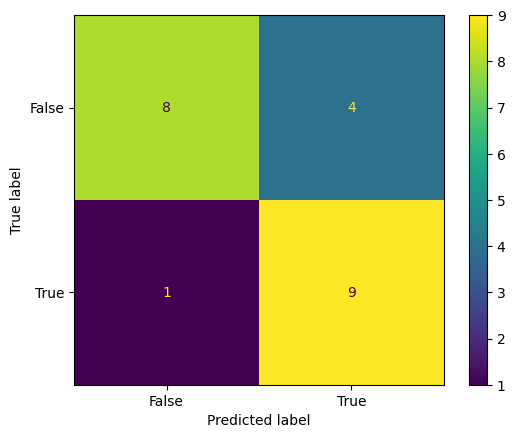

In [48]:
final_precision = precision_score(y_test, y_pred_ensemble)
final_recall = recall_score(y_test, y_pred_ensemble)

print('Accuracy: ', accuracy_score(y_test, y_pred_ensemble))
print('Precision: ', final_precision)
print('Recall: ', final_recall)
print('F1 Score: ', f1_score(y_test, y_pred_ensemble))

cm_display_final = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_ensemble), display_labels=[False, True])
cm_display_final.plot()
plt.show()

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.utils import Sequence

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Reshape the data for LSTM (assuming 2019 time steps)
x_train_reshaped = x_train_scaled.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_reshaped = x_test_scaled.reshape((x_test.shape[0], x_test.shape[1], 1))

# Define the hybrid model
model = Sequential([
    LSTM(32, input_shape=(x_train.shape[1], 1)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

class DataGenerator(Sequence):
    def __init__(self, x, y, batch_size):
        self.x = x
        self.y = y
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        batch_x = self.x[index * self.batch_size:(index + 1) * self.batch_size]
        batch_y = self.y[index * self.batch_size:(index + 1) * self.batch_size]
        # Add any necessary preprocessing here
        return batch_x, batch_y

# Create instances of the generator
train_generator = DataGenerator(x_train_reshaped, y_train, batch_size=8)
val_generator = DataGenerator(x_test_reshaped, y_test, batch_size=8)

# Train the model using generators
model.fit(train_generator, epochs=50, validation_data=val_generator, shuffle=True)


# Evaluate the model on the test set
y_pred_prob = model.predict(x_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')



Epoch 1/50
15/15 [==============================] - 4s 81ms/step - loss: 0.6981 - accuracy: 0.5630 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/50
15/15 [==============================] - 1s 58ms/step - loss: 0.6952 - accuracy: 0.4958 - val_loss: 0.6890 - val_accuracy: 0.5909
Epoch 3/50
15/15 [==============================] - 1s 57ms/step - loss: 0.6931 - accuracy: 0.5714 - val_loss: 0.6874 - val_accuracy: 0.5909
Epoch 4/50
15/15 [==============================] - 1s 60ms/step - loss: 0.6891 - accuracy: 0.5546 - val_loss: 0.6831 - val_accuracy: 0.6818
Epoch 5/50
15/15 [==============================] - 1s 60ms/step - loss: 0.6901 - accuracy: 0.5714 - val_loss: 0.6815 - val_accuracy: 0.6364
Epoch 6/50
15/15 [==============================] - 1s 61ms/step - loss: 0.6875 - accuracy: 0.5462 - val_loss: 0.6777 - val_accuracy: 0.7273
Epoch 7/50
15/15 [==============================] - 1s 61ms/step - loss: 0.6840 - accuracy: 0.5798 - val_loss: 0.6762 - val_accuracy: 0.6818
Epoch 8/50
15

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score

class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize random input weights and biases
        self.input_weights = np.random.rand(self.hidden_size, self.input_size)
        self.hidden_biases = np.random.rand(self.hidden_size, 1)

        # Initialize output weights (to be trained)
        self.output_weights = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, X_train, y_train):
        # Calculate hidden layer output
        hidden_output = self._sigmoid(np.dot(self.input_weights, X_train.T) + self.hidden_biases)

        # Calculate output weights using Moore-Penrose pseudoinverse
        self.output_weights = np.dot(np.linalg.pinv(hidden_output.T), y_train)

    def predict(self, X_test):
        # Calculate hidden layer output for test data
        hidden_output = self._sigmoid(np.dot(self.input_weights, X_test.T) + self.hidden_biases)

        # Calculate predicted output
        y_pred = np.dot(hidden_output.T, self.output_weights)

        return y_pred

# Assuming you have X_train, y_train, X_test, and y_test
# Make sure X_train and X_test are of shape (num_samples, num_features)

# Initialize ELM
elm = ELM(input_size=x_train.shape[1], hidden_size=100, output_size=1)

# Train the ELM
elm.train(x_train, y_train)

# Predict on the test set
y_pred = elm.predict(x_test)

# Convert predictions to binary (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.5454545454545454


In [9]:
import numpy as np
from sklearn.metrics import accuracy_score

class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize random input weights and biases
        self.input_weights = np.random.rand(self.hidden_size, self.input_size)
        self.hidden_biases = np.random.rand(self.hidden_size, 1)

        # Initialize output weights (to be trained)
        self.output_weights = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, X_train, y_train):
        # Calculate hidden layer output
        hidden_output = self._sigmoid(np.dot(self.input_weights, X_train.T) + self.hidden_biases)

        # Calculate output weights using Moore-Penrose pseudoinverse
        self.output_weights = np.dot(np.linalg.pinv(hidden_output.T), y_train)

    def predict(self, X_test):
        # Calculate hidden layer output for test data
        hidden_output = self._sigmoid(np.dot(self.input_weights, X_test.T) + self.hidden_biases)

        # Calculate predicted output
        y_pred = np.dot(hidden_output.T, self.output_weights)

        return y_pred

# Assuming you have X_train, y_train, X_test, and y_test
# Make sure X_train and X_test are of shape (num_samples, num_features)

# Create multiple ELM models
num_models = 5
elm_models = [ELM(input_size=x_train.shape[1], hidden_size=100, output_size=1) for _ in range(num_models)]

# Train each ELM model
for elm_model in elm_models:
    elm_model.train(x_train, y_train)

# Make predictions with each model
all_predictions = [elm_model.predict(x_test) for elm_model in elm_models]

# Ensemble predictions using majority voting
ensemble_predictions = np.mean(all_predictions, axis=0)

# Convert ensemble predictions to binary (0 or 1)
ensemble_predictions_binary = (ensemble_predictions > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, ensemble_predictions_binary)
print(f'Ensemble Test Accuracy: {accuracy}')

Ensemble Test Accuracy: 0.5454545454545454


In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming x_train and x_test are your data features, and y_train, y_test are the corresponding labels
# Ensure that the data is properly preprocessed and formatted

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Add a bias term to the input data
x_train_bias = np.hstack([x_train_scaled, np.ones((x_train_scaled.shape[0], 1))])
x_test_bias = np.hstack([x_test_scaled, np.ones((x_test_scaled.shape[0], 1))])

# Define the number of hidden neurons
num_hidden_neurons = 100  # Adjust as needed

# Initialize random weights for the input layer
input_weights = np.random.rand(x_train_bias.shape[1], num_hidden_neurons)

# Calculate the hidden layer output using a nonlinear activation function (e.g., sigmoid)
hidden_output = 1 / (1 + np.exp(-np.dot(x_train_bias, input_weights)))

# Calculate the output weights using linear regression
output_weights = np.linalg.pinv(hidden_output).dot(y_train)

# Calculate the predicted output on the test set
hidden_output_test = 1 / (1 + np.exp(-np.dot(x_test_bias, input_weights)))
y_test_pred = hidden_output_test.dot(output_weights)

# Convert predicted probabilities to binary predictions
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Evaluate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred_binary)
print(f'Test Accuracy: {accuracy_test}')


Test Accuracy: 0.5909090909090909
